# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [250]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [251]:
df = sinasc_raw[['munResLat','APGAR1','SEMAGESTAC']].copy()
df['munResLat'] = df['munResLat'].apply(lambda x: 'abaixo -10.5' if x <= -10.5 else 'acima -10.5')
df.head()

,munResLat,APGAR1,SEMAGESTAC
0,abaixo -10.5,9.0,39.0
1,abaixo -10.5,8.0,38.0
2,abaixo -10.5,8.0,40.0
3,abaixo -10.5,9.0,38.0
4,abaixo -10.5,8.0,38.0


In [252]:
df = df.groupby('munResLat').agg({'APGAR1': ['mean', 'max', 'min','std','var'], 'SEMAGESTAC': ['mean', 'max', 'min','std','var']})
df

APGAR1                                SEMAGESTAC              \
                  mean   max  min       std       var       mean   max   min   
munResLat                                                                      
abaixo -10.5  8.070216  10.0  0.0  0.960767  0.923073  38.545360  45.0  19.0   
acima -10.5   8.199828  10.0  0.0  1.002826  1.005660  38.588107  45.0  21.0   

                                  
                   std       var  
munResLat                         
abaixo -10.5  2.012435  4.049895  
acima -10.5   2.020771  4.083516

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [253]:
df2 = sinasc_raw[['munResArea','QTDGESTANT','QTDPARTNOR']].copy()
df2['munResArea'] = df2['munResArea'].apply(lambda x: 'abaixo 3000' if x <= 3000 else 'acima 3000')
df2.head()

,munResArea,QTDGESTANT,QTDPARTNOR
0,acima 3000,0.0,0.0
1,acima 3000,1.0,0.0
2,acima 3000,2.0,1.0
3,acima 3000,0.0,0.0
4,acima 3000,1.0,0.0


In [254]:
df2 = df2.groupby('munResArea').agg({'QTDGESTANT': ['mean', 'max', 'min','std','var'], 'QTDPARTNOR': ['mean', 'max', 'min','std','var']})
df2

QTDGESTANT                                QTDPARTNOR             \
                  mean   max  min       std       var       mean   max  min   
munResArea                                                                    
abaixo 3000   1.134300   9.0  0.0  1.208914  1.461473   0.371334  10.0  0.0   
acima 3000    1.310402  52.0  0.0  1.447402  2.094974   0.633000  41.0  0.0   

                                 
                  std       var  
munResArea                       
abaixo 3000  0.856441  0.733490  
acima 3000   1.278903  1.635593

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [255]:
df3 = sinasc_raw[['munResAlt','STDNEPIDEM','STDNNOVA']].copy()
df3['munResAlt'] = df3['munResAlt'].apply(lambda x: 'abaixo 241' if x <= 241 else 'acima 241')
df3.head()

,munResAlt,STDNEPIDEM,STDNNOVA
0,acima 241,0,1
1,acima 241,0,1
2,acima 241,0,1
3,acima 241,0,1
4,acima 241,0,1


In [256]:
df3 = df3.groupby('munResAlt').agg({'STDNEPIDEM': ['mean', 'max', 'min','std','var'], 'STDNNOVA': ['mean', 'max', 'min','std','var']})
df3

STDNEPIDEM                    STDNNOVA                            
                 mean max min  std  var      mean max min       std       var
munResAlt                                                                    
abaixo 241        0.0   0   0  0.0  0.0  0.999733   1   0  0.016324  0.000266
acima 241         0.0   0   0  0.0  0.0  1.000000   1   1  0.000000  0.000000

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [257]:
df4 = sinasc_raw[['munResNome','IDADEMAE','DTNASC']].copy()
df4['munResNome'] = df4['munResNome'].replace(['Candeias do Jamari', 'Guajará-Mirim', 'Itapuã do Oeste', 'Nova Mamoré'], 'Porto Velho')
df4['munResNome'] = df4['munResNome'].replace(['Alto Paraíso', 'Buritis', 'Cacaulândia', 'Campo Novo de Rondônia', 'Cujubim', 'Monte Negro', 'Rio Crespo'], 'Ariquemes')
df4['munResNome'] = df4['munResNome'].replace(['Governador Jorge Teixeira', "Machadinho D'Oeste", 'Theobroma', 'Vale do Anari'], 'Jaru')
df4['munResNome'] = df4['munResNome'].replace(["Alvorada D'Oeste", 'Costa Marques', 'Mirante da Serra', 'Nova União', 'Ouro Preto do Oeste', 'Presidente Médici', 'São Francisco do Guaporé', 'São Miguel do Guaporé', 'Seringueiras', 'Teixeirópolis', 'Urupá', 'Vale do Paraíso'], 'Ji-Paraná')
df4['munResNome'] = df4['munResNome'].replace(["Alta Floresta D'Oeste", 'Alto Alegre dos Parecis', 'Castanheiras', "Espigão D'Oeste", 'Ministro Andreazza', "Nova Brasilândia D'Oeste", 'Novo Horizonte do Oeste', 'Parecis', 'Pimenta Bueno', 'Teixeirópolis', 'Primavera de Rondônia', 'Rolim de Moura', "Santa Luzia D'Oeste", "São Felipe D'Oeste"], 'Cacoal')
df4['munResNome'] = df4['munResNome'].replace(['Cabixi', 'Cerejeiras', 'Chupinguaia', 'Colorado do Oeste', 'Corumbiara', 'Pimenteiras do Oeste'], 'Vilhena')
df4.head()

,munResNome,IDADEMAE,DTNASC
0,Cacoal,19,2019-02-19
1,Cacoal,29,2019-02-21
2,Cacoal,37,2019-02-25
3,Cacoal,30,2019-03-20
4,Cacoal,30,2019-03-23


In [258]:
Porto_Velho = df4[df4['munResNome'] == 'Porto Velho'].groupby('DTNASC')['IDADEMAE'].mean()
Ariquemes = df4[df4['munResNome'] == 'Ariquemes'].groupby('DTNASC')['IDADEMAE'].mean()
Jaru = df4[df4['munResNome'] == 'Jaru'].groupby('DTNASC')['IDADEMAE'].mean()
Ji_Parana = df4[df4['munResNome'] == 'Ji-Paraná'].groupby('DTNASC')['IDADEMAE'].mean()
Cacoal = df4[df4['munResNome'] == 'Cacoal'].groupby('DTNASC')['IDADEMAE'].mean()
Vilhena = df4[df4['munResNome'] == 'Vilhena'].groupby('DTNASC')['IDADEMAE'].mean()

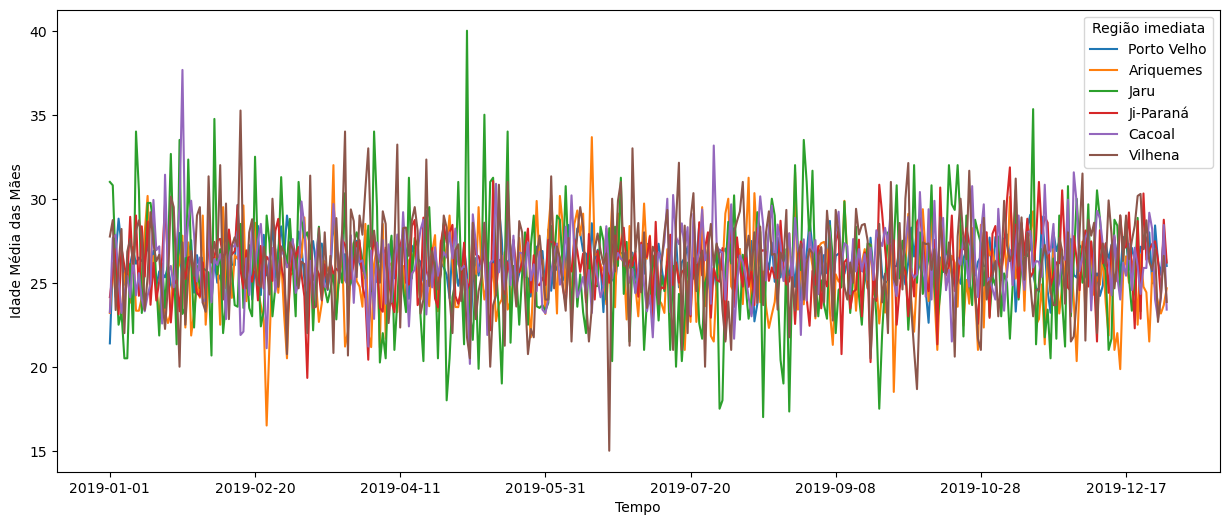

In [138]:
Porto_Velho.plot(figsize=[15,6], label='Porto Velho')
Ariquemes.plot(label='Ariquemes')
Jaru.plot(label='Jaru')
Ji_Parana.plot(label='Ji-Paraná')
Cacoal.plot(label='Cacoal')
Vilhena.plot(label='Vilhena')

plt.legend(title='Região imediata')
plt.ylabel('Idade Média das Mães')
plt.xlabel('Tempo')


plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [259]:
df5 = sinasc_raw[['munResNome']].copy()
df5['IDH'] = np.random.rand(len(df5))
df5 = df5.drop_duplicates(subset='munResNome')
df5.head()

,munResNome,IDH
0,Alta Floresta D'Oeste,0.892406
3,Alto Alegre dos Parecis,0.355110
6,Novo Horizonte do Oeste,0.444484
21,Rolim de Moura,0.862426
43,São Felipe D'Oeste,0.849272


In [260]:
df5['Faixa IDH'] = df5['IDH'].map(lambda x: 'muito alto' if x > 0.736 else ('alto' if x > 0.692 else ('médio' if x > 0.598 else ('baixo' if x > 0.584 else 'muito baixo'))))
df5.head()

,munResNome,IDH,Faixa IDH
0,Alta Floresta D'Oeste,0.892406,muito alto
3,Alto Alegre dos Parecis,0.355110,muito baixo
6,Novo Horizonte do Oeste,0.444484,muito baixo
21,Rolim de Moura,0.862426,muito alto
43,São Felipe D'Oeste,0.849272,muito alto


In [261]:
df5 = df5.groupby(['Faixa IDH', 'IDH'])['munResNome'].apply(list).reset_index()
df5 = df5.set_index('Faixa IDH')

df5

,IDH,munResNome
Faixa IDH,,
alto,0.713782,[Nova Mamoré]
baixo,0.593244,[Seringueiras]
baixo,0.594577,[Teixeirópolis]
muito alto,0.775671,[Chupinguaia]
muito alto,0.782956,[Ouro Preto do Oeste]
muito alto,0.849272,[São Felipe D'Oeste]
muito alto,0.858984,[Castanheiras]
muito alto,0.862207,[São Francisco do Guaporé]
muito alto,0.862426,[Rolim de Moura]


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [262]:
df6 = sinasc_raw[['munResNome']].copy()
df6['IFDM'] = np.random.rand(len(df6))
df6 = df6.drop_duplicates(subset='munResNome')
df6.head()

,munResNome,IFDM
0,Alta Floresta D'Oeste,0.381174
3,Alto Alegre dos Parecis,0.696016
6,Novo Horizonte do Oeste,0.904461
21,Rolim de Moura,0.532365
43,São Felipe D'Oeste,0.972441


In [263]:
df6['Faixa IFDM'] = df6['IFDM'].map(lambda x: 'alto' if x > 0.8 else ('moderado' if x > 0.59 else ('regular' if x > 0.39 else ('baixo'))))
df6 = df6.groupby(['Faixa IFDM', 'IFDM'])['munResNome'].apply(list).reset_index()
df6 = df6.set_index('Faixa IFDM')

df6

,IFDM,munResNome
Faixa IFDM,,
alto,0.851264,[Ariquemes]
alto,0.855647,[Teixeirópolis]
alto,0.859375,[Theobroma]
alto,0.860724,[Porto Velho]
alto,0.887866,[Espigão D'Oeste]
alto,0.904461,[Novo Horizonte do Oeste]
alto,0.916510,[Nova União]
alto,0.967418,[Pimenta Bueno]
alto,0.972441,[São Felipe D'Oeste]


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

R: Entre abril e maio foi registrado na região imediata de Jaru as maiores médias de idade das mães.